*Alexandre Devert*:  **matplotlib** Plotting Cookbook<br>
examples and 

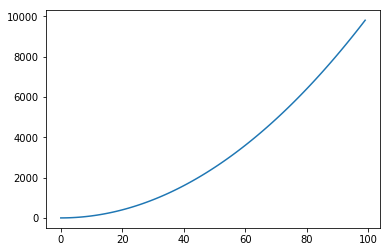

In [1]:
import matplotlib.pyplot as plt # alias
x=range(100) # starting from zero, right open interval
y=[t**2 for t in x] # list comprehension
plt.plot(x,y) # module.attribute
plt.show()

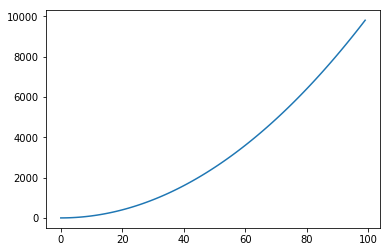

In [2]:
# numpy: the list comprehension can be omitted
import numpy as np
x=np.array(range(100))
plt.plot(x,x*x) # elementwise operation
plt.show()

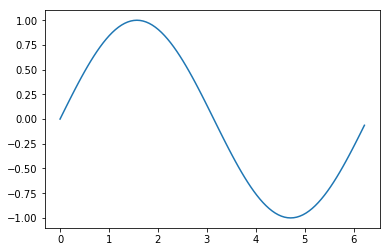

In [3]:
import math
T=range(100)
x=[(2*math.pi*t)/len(T) for t in T]
y=[math.sin(value) for value in x]
plt.plot(x,y)
plt.show()

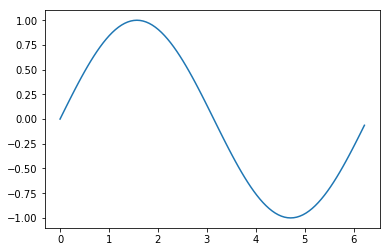

In [4]:
x = 2*math.pi*np.array(T)/len(T)
plt.plot(x, np.sin(x))
plt.show()

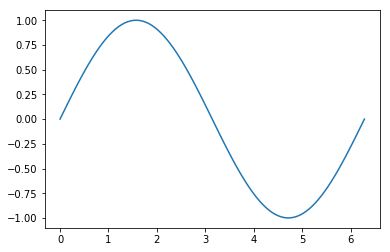

In [5]:
# a more numpy-ish form
x=np.linspace(0,2*np.pi,100)
plt.plot(x,np.sin(x))
plt.show()

numpy's claim: **easier** to read and **faster** to code<br>
ok, let's make some measurements (w/o the plots)

In [6]:
def tradpy(n):
    x=[(2*math.pi*t)/n for t in range(n)]
    y=[math.sin(t) for t in x]
def numpyish(n):
    x=np.linspace(0,2*np.pi,n)
    y=np.sin(x)

n=200
%timeit numpyish(n)
%timeit tradpy(n)
    

48.4 µs ± 752 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
121 µs ± 785 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**combine** plots:

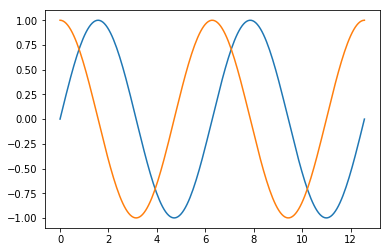

In [7]:
x=np.linspace(0,4*np.pi,200)
ys=np.sin(x)
yc=np.cos(x)
plt.plot(x,ys)
plt.plot(x,yc)
plt.show() # deferred rendering

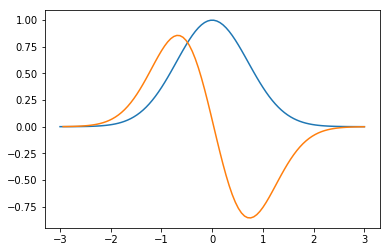

In [8]:
x=np.linspace(-3,3,100)
y=np.exp(-x**2)
plt.plot(x,y)
def slope(x,y):
    dx=x[1:]-x[:-1] # slice
    dy=y[1:]-y[:-1]
    return dy/dx
plt.plot(x[1:],slope(x,y))
plt.show()


a somewhat general version:

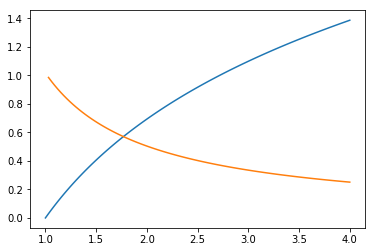

In [9]:
def func(x):
    return np.log(x)
def plotfdf(func,a,b,nx):
    x=np.linspace(a,b,nx)
    y=func(x)
    plt.plot(x,y)
    xs=x[1:]-x[:-1]
    ys=y[1:]-y[:-1]
    plt.plot(x[1:],ys/xs)
    plt.show()
plotfdf(func,1,4,100)

for quick experiments just use **lambda**:

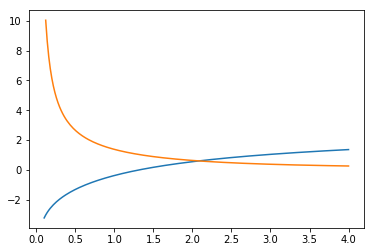

In [10]:
def plotfdf(func,a,b,nx):
    x=np.linspace(a,b,nx)
    y=func(x)
    plt.plot(x,y)
    xs=x[1:]-x[:-1]
    ys=y[1:]-y[:-1]
    plt.plot(x[1:],ys/xs)
    plt.show()
#plotfdf(np.log,0.1,4,200) #for simple fun-s no need to lambda
plotfdf(lambda x: np.log(x)-np.exp(-x),0.1,4,200) 

examples of **lambda** usage: 
[http://www.secnetix.de/olli/Python/lambda_functions.hawk](http://www.secnetix.de/olli/Python/lambda_functions.hawk)

read data from files:

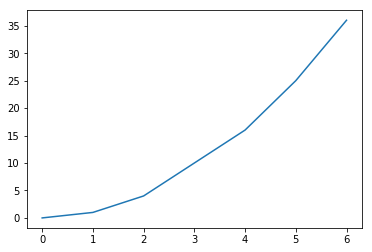

In [11]:
# the python way
# read from the file 'data' in the working directory
x,y=[],[]
for line in open('data','r'):
    v=[float(num) for num in line.split()]
    x.append(v[0])
    y.append(v[1])
plt.plot(x,y)
plt.show()

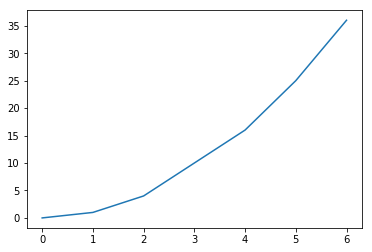

In [12]:
# a more involved version
with open('data', 'r') as f:
    x,y=zip(*[[float(s) for s in line.split()] for line in f])
plt.plot(x,y)
plt.show()    

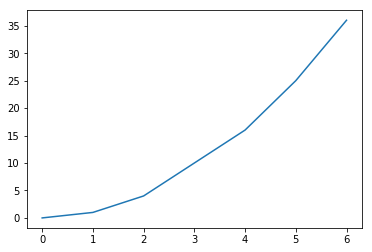

In [13]:
# a numpy version
xy=np.loadtxt('data')
plt.plot(xy[:,0],xy[:,1])
plt.show()    

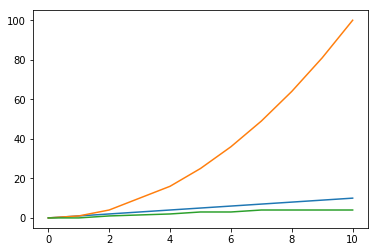

In [14]:
# the same for arbitrary num of columns
data=np.loadtxt('data2')
for c in data.T: # .T: the transpose of a 2d-array
    plt.plot(data[:,0], c)
plt.show()

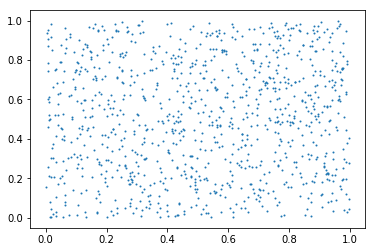

In [15]:
# scatter, random, rand
data=np.random.rand(1000,2)
plt.scatter(data[:,0],data[:,1],s=1) # marker size scaled by s
plt.show()

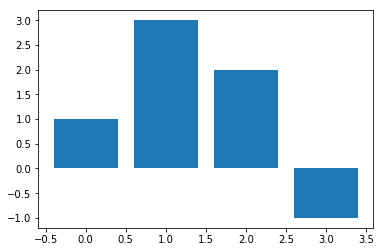

In [16]:
# barchart
data = [1,3,2,-1]
plt.bar(range(len(data)), data)
plt.show()

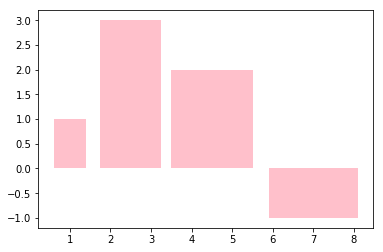

In [17]:
# barchart, width, color
data = [1,3,2,-1]
plt.bar([1,2.5,4.5,7], data,width=[0.8,1.5,2,2.2],
    color='pink')
plt.show()

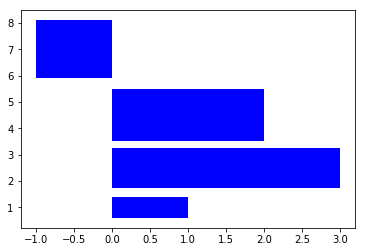

In [18]:
# horizontal barchart
data = [1,3,2,-1]
plt.barh([1,2.5,4.5,7],data,height=[0.8,1.5,2,2.2],
        color='b')
plt.show()

for the names of colors see [https://matplotlib.org/examples/color/named_colors.html](https://matplotlib.org/examples/color/named_colors.html)

**todo**: multiple,stacked,back-to-back barchart

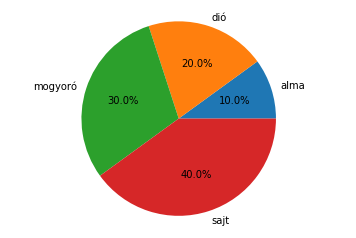

In [19]:
# pie chart
plt.pie([1,2,3,4],labels=['alma','dió','mogyoró','sajt'],
        autopct='%1.1f%%')
plt.axis('equal')
plt.show()


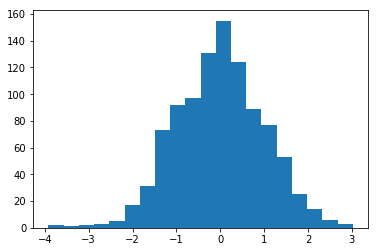

In [20]:
# histogram
#plt.hist
plt.hist(np.random.randn(1000),bins=20)
plt.show()

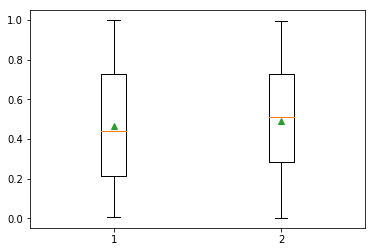

In [21]:
# boxplot
#?plt.boxplot
data=np.random.rand(100,2)
plt.boxplot(data,showmeans=True)#, vert=False)
plt.show()

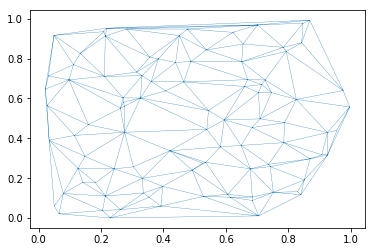

In [22]:
# triangulations
import matplotlib.tri as tri
plt.clf()
data=np.random.rand(100,2)
triangles = tri.Triangulation(data[:,0], data[:,1])
plt.triplot(triangles,linewidth=0.3) # adjust width of lines
plt.show()
del(tri)

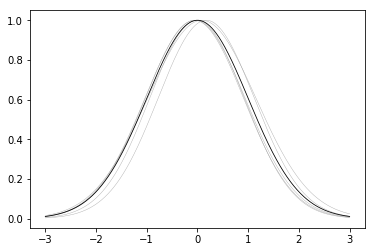

In [23]:
def normpdf(mu,sig):
    return lambda x:np.exp(-((x-mu)**2)/(2*sig**2))
    /(sig*np.sqrt(2*np.pi))
x = np.linspace(-3, 3, 1000)
for i in range(5):
    samples=np.random.standard_normal(200)
    mu,sig=np.mean(samples),np.std(samples)
    plt.plot(x,normpdf(mu,sig)(x),color='0.66',linewidth=0.4)
plt.plot(x,normpdf(0., 1.)(x),color = 'k',linewidth=0.8)
plt.show()

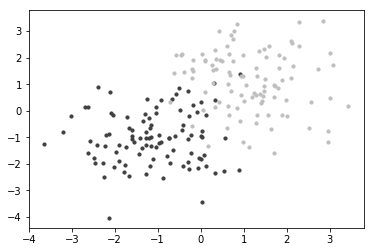

In [25]:
# scatter with different colors
A=np.random.standard_normal((100, 2))-(1,1)
B=np.random.standard_normal((100, 2))+(1,1)
plt.scatter(A[:,0],A[:,1],color='.25',s=10)
plt.scatter(B[:,0],B[:,1],color='.75',s=10)
plt.show()

online datasets: [http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml)

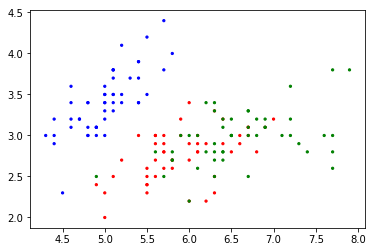

In [78]:
# the data is always downloaded
import pandas as pd
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    header=None)
n2c={'Iris-setosa':'b','Iris-versicolor':'r','Iris-virginica':'g'}
plt.scatter(df[0],df[1],s=5,color=[n2c[i] for i in df[4]])
plt.show()


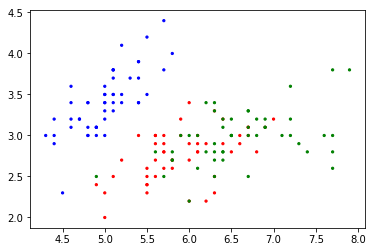

In [111]:
# iris data, download only once
#%rm iris.data
#df=None
while True: #todo: try...except and scoping
    try: 
        df=pd.read_csv('iris.data',header=None)
        break
    except:
        print('no local copy, trying to download')
        tdf=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
            header=None)
        tdf.to_csv("iris.data",header=False,index=False)
        del(tdf)
n2c={'Iris-setosa':'b','Iris-versicolor':'r','Iris-virginica':'g'}
#print(df)
plt.scatter(df[0],df[1],s=5,color=[n2c[i] for i in df[4]])
plt.show()    

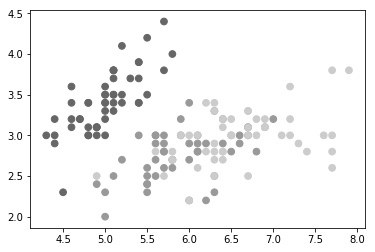

In [137]:
# iris data, download only once, urllib2 version
# %rm iris.data
df=None
while True:
    try: 
        df=pd.read_csv('iris.data',header=None)
        break
    except:
        print('no local copy, trying to download')
        import urllib.request as ur
        resp=ur.urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
        data=resp.read()
        f=open('iris.data','bw') #binary write
        f.write(data)
        f.close()      
        del(resp,data,f)
n2c={'Iris-setosa':'0.4','Iris-versicolor':'0.6','Iris-virginica':'0.8'}
#print(df)
color=[n2c[i] for i in df[4]]
#edgecolor=[str(1-float(i)) for i in color]
edgecolor=None
plt.scatter(df[0],df[1],s=45,color=color,edgecolor=edgecolor)
plt.show()    

todo: 
1. work out the **np.DataSource** version of the prev. example
2. learn usage of np.loadtxt()

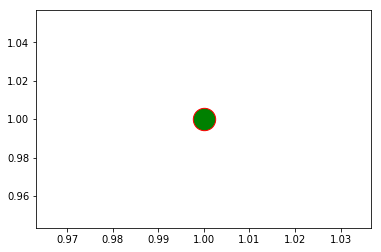

In [136]:
plt.scatter([1],[1],s=500,color='g',edgecolor='r')
plt.show()